# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [2]:
# Herramientas de uso
import itertools

# Gemas del Infinito
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Adicionales
from matplotlib.ticker import ScalarFormatter

#Machine Learning


#NLP
import nltk

# Configuración NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Metodología de trabajo

Aqui irá un resumen de lo desarrollado

## 1. Exploración

### 1.1 Espacio de trabajo

* **Dataset Dev**

In [3]:
dataset_dev = pd.read_json('dataset_amazon/dataset_es_dev.json', lines= True)
dataset_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


* **Dataset Train**

In [4]:
dataset_train = pd.read_json('dataset_amazon/dataset_es_train.json', lines= True)
dataset_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


* **Dataset Test**

In [5]:
dataset_test = pd.read_json('dataset_amazon/dataset_es_test.json', lines= True)
dataset_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


### 1.2 Exploración inicial

Número de instancias en el dataset:

In [6]:
dataset_dev.shape

(5000, 8)

In [7]:
dataset_train.shape

(200000, 8)

In [8]:
dataset_test.shape

(5000, 8)

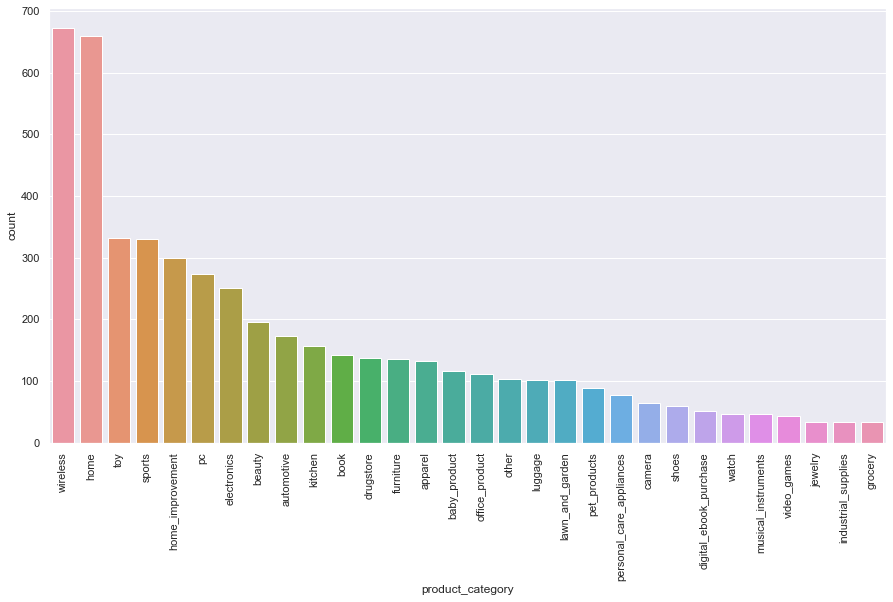

In [9]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=dataset_dev, x='product_category',order = dataset_dev.product_category.value_counts().index)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Se encuentra que la principal categoria de reseñas correspontes a wireless, home, toy, sports y home_improvement. Ahora buscaremos dividir el dataset según el número de estrellas y ubicar qué categorias son populares a partir de la calificación.

## 1.2 Exploracion por calificacion

#### Categorias populares con 1 estrella

In [10]:
one_star = dataset_dev[dataset_dev.stars==1]
one_star.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


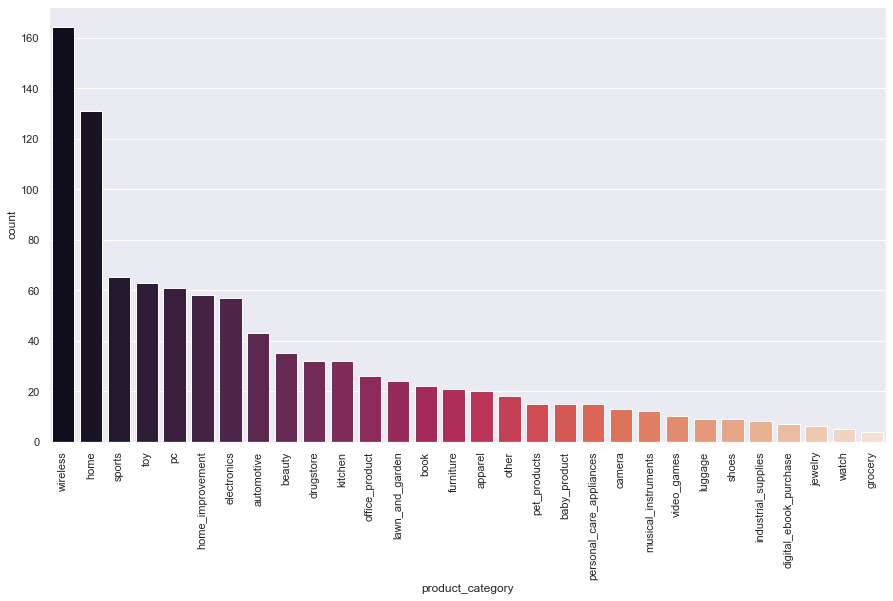

In [11]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=one_star, x='product_category',order = one_star.product_category.value_counts().index,palette='rocket')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Categorias populares con 2 estrella

In [12]:
two_star = dataset_dev[dataset_dev.stars==2]
two_star.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
1000,es_0118732,product_es_0968323,reviewer_es_0145809,2,Me han enviado algo completamente diferente. E...,Muy mal,es,home
1001,es_0696968,product_es_0860895,reviewer_es_0999762,2,En menos de 2 semanas de uso una de las mangas...,Baja calidad de producto,es,kitchen
1002,es_0874902,product_es_0170859,reviewer_es_0981966,2,"Hicimos el pedido de la barrera, hasta ahí tod...",Decepcionados con el embalaje y el estado del ...,es,baby_product
1003,es_0773654,product_es_0429247,reviewer_es_0191603,2,Queda grande no es una S pero se puede arregla...,Mas o menos,es,apparel
1004,es_0532571,product_es_0293429,reviewer_es_0799746,2,En 5 días de uso se ha roto el pulsador de pue...,Poca calidad,es,home_improvement


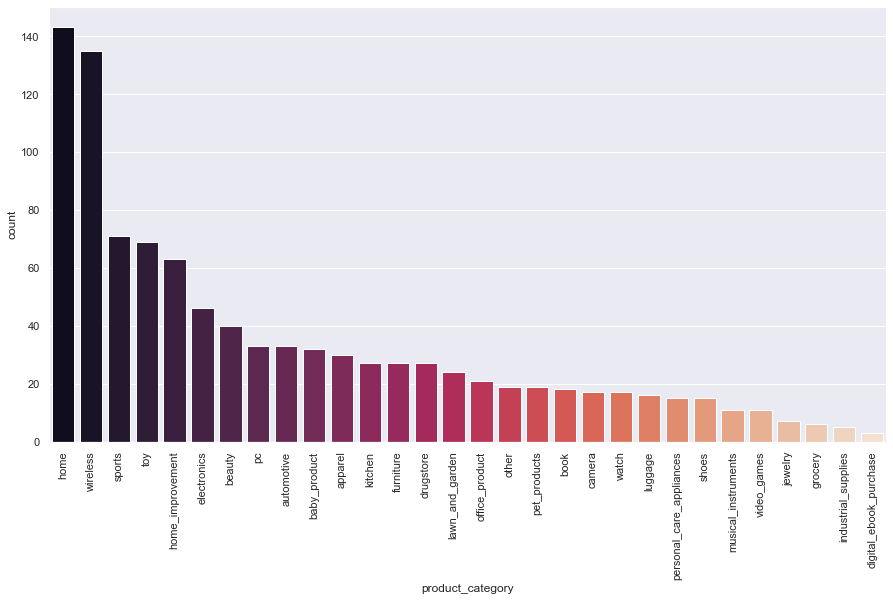

In [13]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=two_star, x='product_category',order = two_star.product_category.value_counts().index,palette='rocket')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Categorias populares con 3 estrella

In [14]:
three_star = dataset_dev[dataset_dev.stars==3]
three_star.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
2000,es_0176929,product_es_0553307,reviewer_es_0240217,3,"Nos gusto por su color, tejido y calidad de es...",Encaja,es,lawn_and_garden
2001,es_0032372,product_es_0720285,reviewer_es_0348916,3,"Ha llegado rápido. , Es más pequeña de lo que ...",Simple.,es,luggage
2002,es_0446630,product_es_0413759,reviewer_es_0118864,3,Me ha gustado el producto,Buen producto,es,watch
2003,es_0001452,product_es_0619908,reviewer_es_0037222,3,"se despega rápido, lo que he hecho ha sido coc...",bien,es,kitchen
2004,es_0315490,product_es_0435465,reviewer_es_0988902,3,no parece tampoco muy especifico para animales...,BASICO,es,drugstore


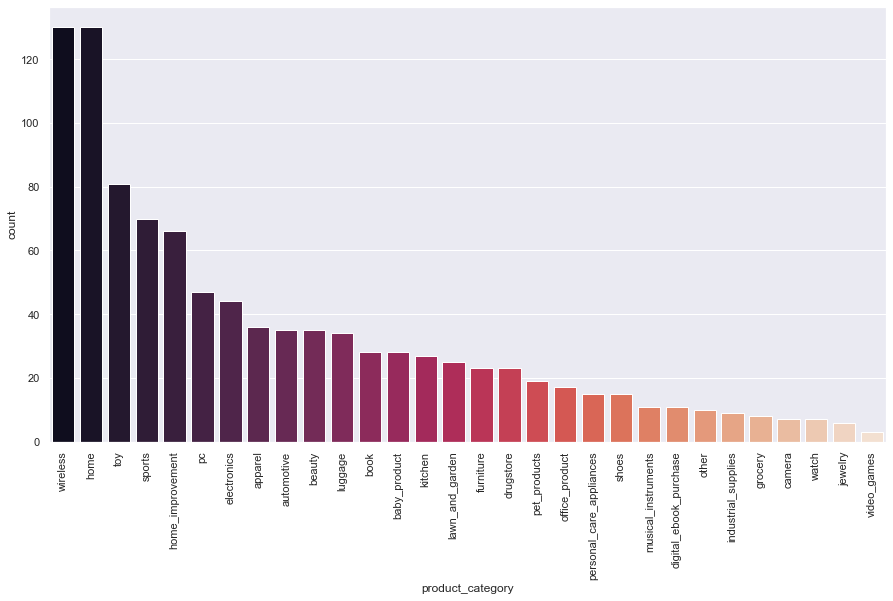

In [15]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=three_star, x='product_category',order = three_star.product_category.value_counts().index,palette='rocket')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Categorias populares con 4 estrella

In [16]:
four_star = dataset_dev[dataset_dev.stars==4]
four_star.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
3000,es_0638126,product_es_0921838,reviewer_es_0467790,4,Son robustas y francamente cumplen con su come...,Gran juego de llaves.,es,home_improvement
3001,es_0957542,product_es_0016810,reviewer_es_0205107,4,Estupenda relación calidad-precio,Funcional,es,home_improvement
3002,es_0571992,product_es_0161938,reviewer_es_0304170,4,Lo compré para mi madre. Esta muy contenta. Es...,compacto y cómodo,es,furniture
3003,es_0469900,product_es_0182832,reviewer_es_0562273,4,"UN POCO ESTRECHO ,PERO VALE PARA LO QUE ES,PAR...",ESTA BIEN,es,home_improvement
3004,es_0832100,product_es_0922601,reviewer_es_0049840,4,Le doy cuatro estrellas porque aún no lo he pr...,Nice.,es,wireless


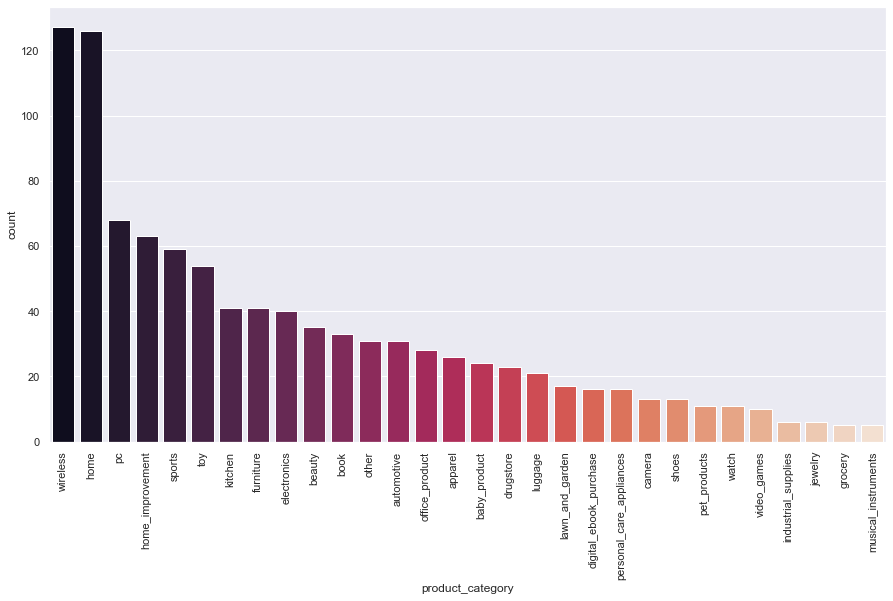

In [17]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=four_star, x='product_category',order = four_star.product_category.value_counts().index,palette='rocket')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Categorias populares con 5 estrella

In [18]:
five_star = dataset_dev[dataset_dev.stars==5]
five_star.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
4000,es_0973261,product_es_0163826,reviewer_es_0461590,5,"Mi pareja encantada con esta adquisición, prác...","Muy Útil, ligero y hace su papel para lo que es",es,toy
4001,es_0285657,product_es_0396230,reviewer_es_0837511,5,En cuanto lo compré mi gato se olvidó de rasca...,Funciona,es,pet_products
4002,es_0777148,product_es_0566248,reviewer_es_0269131,5,Café de excelente calidad. Las cápsulas sin al...,Cápsulas compatibles con maquina nespresso rec...,es,grocery
4003,es_0554747,product_es_0244949,reviewer_es_0800916,5,Te atrapa desde el primer minuto!!! Lectura fá...,Te atrapa,es,digital_ebook_purchase
4004,es_0685602,product_es_0991354,reviewer_es_0579306,5,"Está muy bien montado, y resulta muy vistoso. ...",que sea lo pedido,es,jewelry


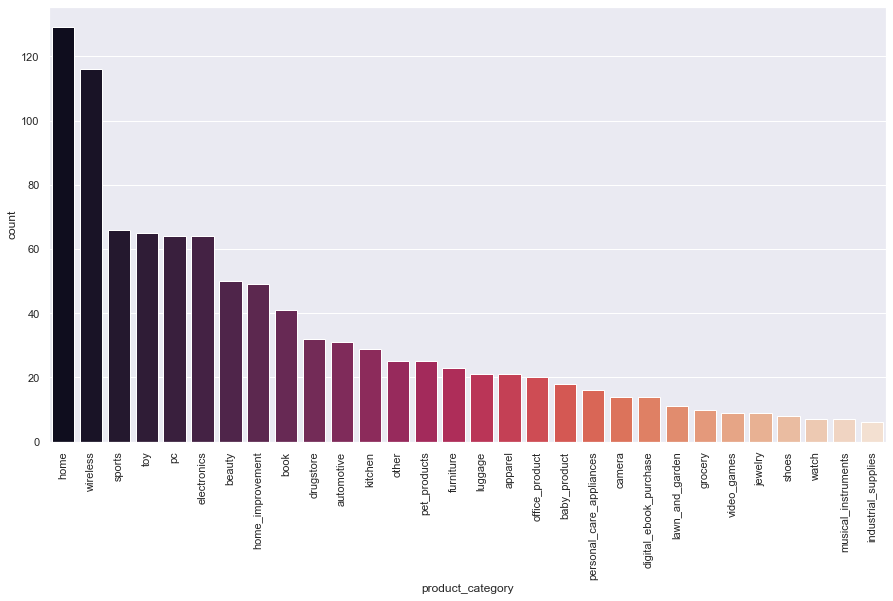

In [19]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=five_star, x='product_category',order = five_star.product_category.value_counts().index,palette='rocket')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Observamos que sin distincion a la clasificacion, las categorias parecen seguir el mismo comportamiento. 

Este comportamiento nos indica que el numero de estrellas no esta muy relacionado a la categoria de un producto. Esto es, productos de x o y categoria no se distinguen por su alto/bajo calificacion.

## 2. Analisis exploratorio de reviews y title reviews

## 2.1 Exploracion de title Review

In [20]:
dataset_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [21]:
dataset_dev.language.value_counts()

es    5000
Name: language, dtype: int64

In [22]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [23]:
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [24]:
title_reviews = []
calification = []
for i in range(dataset_dev.shape[0]):
    title = dataset_dev.iloc[i].review_title.lower()
    star = dataset_dev.iloc[i].stars
    title = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(title)
    title = [word for word in title if word not in stopwords]

    title_reviews.append(title)
    calification.append(star)

In [25]:
title_reviews

[['mala', 'compra'],
 ['recibido'],
 ['aprieta', 'bien', 'manillar'],
 ['brocas', 'mantequilla'],
 ['gusta'],
 ['bolas', 'rotas'],
 ['parte', 'poder', 'elegir', 'color'],
 ['tapa', 'pantalla'],
 ['recibido', 'producto'],
 ['patata'],
 ['desliza', 'hacia', 'abajo', 'rato'],
 ['comprar'],
 ['recoge'],
 ['sirve'],
 ['endeble'],
 ['nunca', 'entregaron', 'juegos'],
 ['malo'],
 ['bolsitas'],
 ['llegado'],
 ['recomiendo'],
 ['coronas'],
 ['resistente'],
 ['mamá'],
 ['embalaje', 'directamente', 'caja'],
 ['malisimo'],
 ['estafa'],
 ['material', 'poca', 'calidad'],
 ['cubierta', 'asiento'],
 ['funciona'],
 ['difícil', 'limpiar'],
 ['deja', 'funcionar'],
 ['pequeños'],
 ['exploto', 'nunca', 'repusieron'],
 ['mala', 'calidad'],
 ['mala', 'calidad'],
 ['alimentador', 'soporte'],
 ['van', 'conos'],
 ['recibido', 'paquete'],
 ['paga', 'devoluciones'],
 ['producto', 'averiado'],
 ['funcionado', 'primer', 'momento'],
 [],
 ['endeble'],
 ['volvere', 'comprar'],
 ['producto', 'usado', 'incompleto'],
 ['

In [26]:
title_reviews = list(itertools.chain(*title_reviews))
title_reviews[0:12]

['mala',
 'compra',
 'recibido',
 'aprieta',
 'bien',
 'manillar',
 'brocas',
 'mantequilla',
 'gusta',
 'bolas',
 'rotas',
 'parte']

In [27]:
freq_tl = nltk.FreqDist(title_reviews)
freq_tl

FreqDist({'calidad': 401, 'bien': 309, 'buena': 237, 'precio': 230, 'producto': 190, 'buen': 189, 'mal': 108, 'mala': 104, 'perfecto': 102, 'bueno': 85, ...})

In [28]:
df_tl = pd.DataFrame(list(freq_tl.items()), columns = ["Word","W_Frequency"])
df_tl.head()

,Word,W_Frequency
0,mala,104
1,compra,83
2,recibido,18
3,aprieta,1
4,bien,309


In [29]:
df_tl.sort_values('W_Frequency',ascending=False, inplace = True)
df_tl.head()

,Word,W_Frequency
44,calidad,401
4,bien,309
273,buena,237
503,precio,230
17,producto,190


In [30]:
df_tl.reset_index(drop = True, inplace=True)
df_tl.head()

,Word,W_Frequency
0,calidad,401
1,bien,309
2,buena,237
3,precio,230
4,producto,190


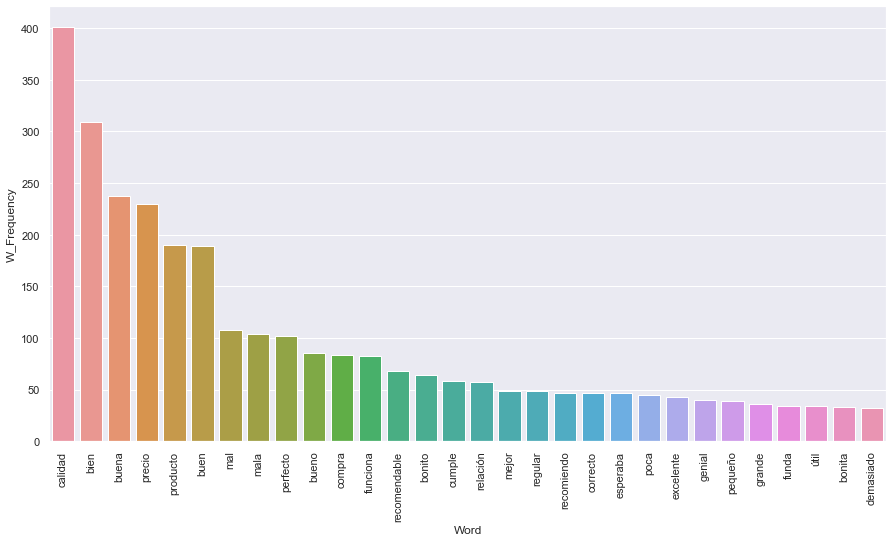

In [31]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_tl.iloc[:30].Word, y = df_tl.iloc[:30].W_Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Se observan las palabrás más frecuentes en los títulos de los reviews. Aunque esta gráfica no nos permite diferenciar cuales se refieren a críticas buenas o malas.

Se definira una funcion que nos permite realizar el tokenizado clasificando a partir del numero de estrellas.

In [32]:
def token_npl(dataset, stopwords, star):
    title_reviews = []
    calification = []
    for i in range(dataset.shape[0]):
        title = dataset.iloc[i].review_title.lower()
        title = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(title)
        title = [word for word in title if word not in stopwords]

        title_reviews.append(title)
        calification.append(star)
        
    title_reviews = list(itertools.chain(*title_reviews))
    freq_tl = nltk.FreqDist(title_reviews)
    df_tl = pd.DataFrame(list(freq_tl.items()), columns = ["Word","Frequency"])
    df_tl['Calification'] = star
    df_tl.sort_values('Frequency',ascending=False, inplace = True)
    df_tl.reset_index(drop = True, inplace=True)
        
    return df_tl

In [33]:
df_one = token_npl(one_star, stopwords, 1)
df_one.head(5)

,Word,Frequency,Calification
0,calidad,55,1
1,producto,52,1
2,mala,48,1
3,mal,37,1
4,funciona,27,1


In [34]:
df_two = token_npl(two_star, stopwords, 2)
df_two.head()

,Word,Frequency,Calification
0,calidad,85,2
1,bien,52,2
2,mala,46,2
3,mal,29,2
4,producto,23,2


In [35]:
df_three = token_npl(three_star, stopwords, 3)
df_three.head()

,Word,Frequency,Calification
0,bien,97,3
1,calidad,66,3
2,precio,58,3
3,mal,36,3
4,buena,35,3


In [36]:
df_three = token_npl(three_star, stopwords, 3)
df_three.head()

,Word,Frequency,Calification
0,bien,97,3
1,calidad,66,3
2,precio,58,3
3,mal,36,3
4,buena,35,3


In [37]:
df_four = token_npl(four_star, stopwords, 4)
df_four.head()

,Word,Frequency,Calification
0,buena,110,4
1,bien,99,4
2,calidad,99,4
3,precio,90,4
4,buen,70,4


In [38]:
df_five = token_npl(five_star, stopwords, 5)
df_five.head()

,Word,Frequency,Calification
0,calidad,96,5
1,buen,84,5
2,buena,74,5
3,perfecto,70,5
4,precio,53,5


Se encuentra que los titulos de los reviews no se encuentran palabras relevantes en relacion a la calificacion que el usuario le da al producto. Por el contrario, se repiten palabras independientemente de la calificacion. Por lo que esta columna de los datos puede darnos un panorama confuso al momento de entrenar el modelo.
Sin embargo un analisis de ngramas pueden darnos alguna idea de las frases que se repiten comunmente en los comentarios buenos y malos. 

Vamos a dividir el dataset en dos segun la calificacion que se dio, para ello definiremos bueno calificaciones mayores a 3 y malos 3 o menor.

In [77]:
good = dataset_dev[dataset_dev.stars>=3]
bad=dataset_dev[dataset_dev.stars<3]
bad

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
...,...,...,...,...,...,...,...,...
1995,es_0030937,product_es_0714707,reviewer_es_0625309,2,"Son muy pequeños,pensé que eran más grandes. N...",Ana Maria,es,jewelry
1996,es_0056828,product_es_0000924,reviewer_es_0953528,2,Es la segunda vez que lo compro. La primera ve...,Capsulas Café,es,grocery
1997,es_0461030,product_es_0254933,reviewer_es_0016628,2,"Tengo que decir que el aparato va bien, pero a...",NO ME HA FUNCIONADO,es,personal_care_appliances
1998,es_0956731,product_es_0005514,reviewer_es_0637278,2,Para bebés nada preciso. No lo recomiendo nada...,No recomendado para bebes,es,personal_care_appliances


In [78]:
#Funcion para dividir los titulos en ngramas 
def ngramas(data,ngrama):
    title_reviews = []
    calification = []
    for i in range(data.shape[0]):
        title = data.iloc[i].review_title.lower()
        star = data.iloc[i].stars
        title = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(title)
        title = [word for word in title if len(word)>3]

        title_reviews.append(title)
        calification.append(star)
    #Separamos por palabras 
    title_reviews_flatten = [word for l in title_reviews for word in l]
    #construimos los ngrams
    ngramas=list(ngrams(title_reviews_flatten,ngrama))
    fdist_n=nltk.FreqDist(ngramas)
    print(f'Los 10 ngramas mas comunes son: \n {fdist_n.most_common(10)}\n')
    print('Grafica de los ngramas mas comunes')
    fdist_n.plot(15)

## Ngramas para comentarios con calificación buena

Los 10 ngramas mas comunes son: 
 [(('calidad', 'precio'), 120), (('buen', 'producto'), 71), (('buena', 'calidad'), 61), (('relación', 'calidad'), 50), (('buena', 'compra'), 41), (('buena', 'relación'), 34), (('bien', 'pero'), 33), (('está', 'bien'), 20), (('buen', 'precio'), 20), (('esta', 'bien'), 19)]

Grafica de los ngramas mas comunes


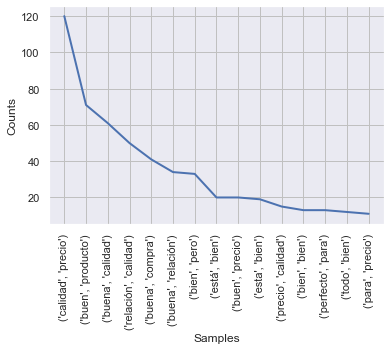

In [82]:
ngramas(good,2)

Los 10 ngramas mas comunes son: 
 [(('relación', 'calidad', 'precio'), 49), (('buena', 'relación', 'calidad'), 30), (('relacion', 'calidad', 'precio'), 11), (('buena', 'calidad', 'precio'), 11), (('calidad', 'precio', 'buena'), 10), (('buena', 'relacion', 'calidad'), 7), (('buen', 'producto', 'bien'), 6), (('calidad', 'precio', 'bien'), 6), (('calidad', 'precio', 'buen'), 6), (('calidad', 'precio', 'bueno'), 5)]

Grafica de los ngramas mas comunes


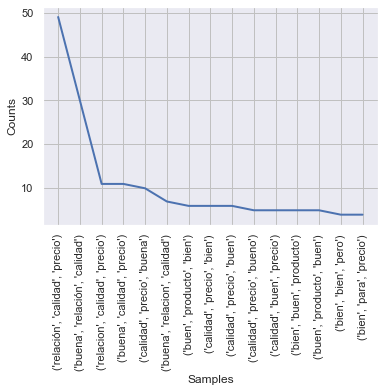

In [83]:
#trigramas
ngramas(good,3)

## Ngramas para comentarios con calificacion mala 

Los 10 ngramas mas comunes son: 
 [(('mala', 'calidad'), 59), (('bien', 'pero'), 13), (('para', 'nada'), 12), (('calidad', 'precio'), 12), (('baja', 'calidad'), 11), (('merece', 'pena'), 10), (('sirve', 'para'), 8), (('calidad', 'mala'), 8), (('buena', 'calidad'), 8), (('funciona', 'bien'), 8)]

Grafica de los ngramas mas comunes


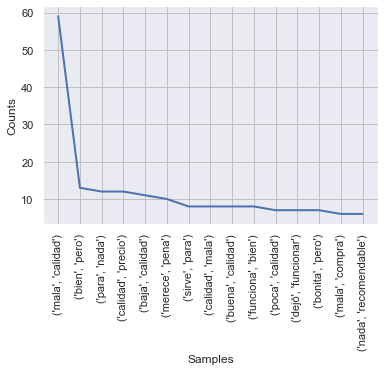

In [84]:
#bigrama
ngramas(bad,2)

Los 10 ngramas mas comunes son: 
 [(('calidad', 'mala', 'calidad'), 5), (('esperaba', 'algo', 'mejor'), 5), (('sirve', 'para', 'nada'), 4), (('mala', 'calidad', 'mala'), 3), (('mala', 'calidad', 'imagen'), 3), (('vale', 'para', 'nada'), 3), (('bonita', 'pero', 'defectuosa'), 3), (('funciona', 'mala', 'calidad'), 2), (('foto', 'mala', 'calidad'), 2), (('mala', 'calidad', 'buena'), 2)]

Grafica de los ngramas mas comunes


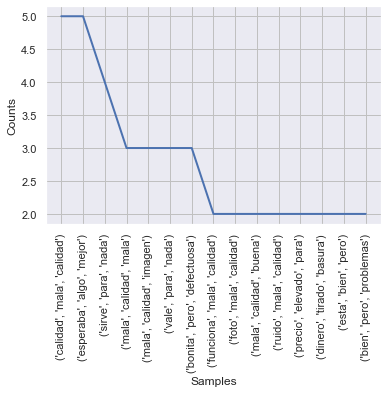

In [80]:
#trigrama
ngramas(bad,3)

Con el analisis de ngramas podemos ver frases comunes que en el lenguaje natural explican el porque de la calificación buena o mala de cada item 

## 2.2 Exploracion de Review

In [39]:
def token_npl(dataset, stopwords, star):
    title_reviews = []
    calification = []
    for i in range(dataset.shape[0]):
        title = dataset.iloc[i].review_body.lower()
        title = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(title)
        title = [word for word in title if word not in stopwords]

        title_reviews.append(title)
        calification.append(star)
        
    title_reviews = list(itertools.chain(*title_reviews))
    freq_tl = nltk.FreqDist(title_reviews)
    df_tl = pd.DataFrame(list(freq_tl.items()), columns = ["Word","Frequency"])
    df_tl['Calification'] = star
    df_tl.sort_values('Frequency',ascending=False, inplace = True)
    df_tl.reset_index(drop = True, inplace=True)
        
    return df_tl

### 2.2.1 Exploracion general

In [40]:
df_r = token_npl(dataset_dev, stopwords, 1)
df_r.head(10)

,Word,Frequency,Calification
0,bien,1328,1
1,calidad,788,1
2,producto,605,1
3,si,599,1
4,precio,583,1
5,buena,461,1
6,bastante,324,1
7,funciona,282,1
8,buen,274,1
9,mas,247,1


Se observan que estas palabras, al igual que en el ejemplo con las tittle reviews, son muy generales y relacionadas al contexto del dataset (calidad, producto, si, precio, bien). Se modificaran las stopwords.

In [41]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [42]:
filtrar = ['bien','producto','si','buena','mas','bastante','buen','dos','hace','calidad','precio','queda','solo']

In [43]:
def token_npl(dataset, stopwords, star):
    title_reviews = []
    calification = []
    for i in range(dataset.shape[0]):
        title = dataset.iloc[i].review_body.lower()
        title = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(title)
        title = [word for word in title if word not in stopwords]
        title = [word for word in title if word not in filtrar]

        title_reviews.append(title)
        calification.append(star)
        
    title_reviews = list(itertools.chain(*title_reviews))
    freq_tl = nltk.FreqDist(title_reviews)
    df_tl = pd.DataFrame(list(freq_tl.items()), columns = ["Word","Frequency"])
    df_tl['Calification'] = star
    df_tl.sort_values('Frequency',ascending=False, inplace = True)
    df_tl.reset_index(drop = True, inplace=True)
        
    return df_tl

In [44]:
df_r = token_npl(dataset_dev, stopwords, 1)
del df_r['Calification']
df_r.head(10)

,Word,Frequency
0,funciona,282
1,recomiendo,245
2,parece,243
3,tiempo,225
4,uso,221
5,perfecto,217
6,compra,210
7,va,209
8,vez,209
9,puede,206


#### 2.2.2 Exploración a partir de la clasificacion

In [45]:
df_r_one = token_npl(one_star, stopwords, 1)
df_r_one.head(5)

,Word,Frequency,Calification
0,recomiendo,79,1
1,amazon,71,1
2,llegado,70,1
3,dinero,70,1
4,funciona,62,1


In [46]:
df_r_two = token_npl(two_star, stopwords, 2)
df_r_two.head(5)

,Word,Frequency,Calification
0,parece,60,2
1,vez,59,2
2,uso,57,2
3,demasiado,53,2
4,mal,53,2


In [47]:
df_r_three = token_npl(three_star, stopwords, 3)
df_r_three.head(5)

,Word,Frequency,Calification
0,aunque,65,3
1,parece,60,3
2,mal,58,3
3,funciona,52,3
4,puede,51,3


In [48]:
df_r_four = token_npl(four_star, stopwords, 4)
df_r_four.head(5)

,Word,Frequency,Calification
0,cumple,76,4
1,funciona,68,4
2,perfecto,64,4
3,aunque,57,4
4,perfectamente,57,4


In [49]:
df_r_five = token_npl(five_star, stopwords, 5)
df_r_five.head(5)

,Word,Frequency,Calification
0,perfecto,105,5
1,compra,86,5
2,recomiendo,67,5
3,perfectamente,64,5
4,va,53,5


In [50]:
df_token = pd.concat([df_r_one, df_r_two, df_r_three, df_r_four, df_r_five])
df_token.sort_values('Frequency',ascending=False, inplace = True)
df_token.reset_index(drop = True, inplace=True)
df_token.head(10)

,Word,Frequency,Calification
0,perfecto,105,5
1,compra,86,5
2,recomiendo,79,1
3,cumple,76,4
4,amazon,71,1
5,llegado,70,1
6,dinero,70,1
7,funciona,68,4
8,recomiendo,67,5
9,aunque,65,3


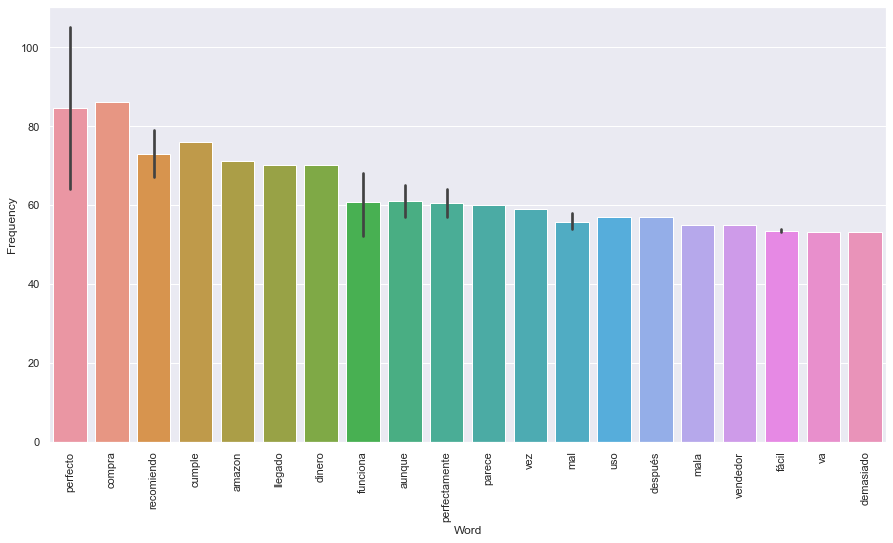

In [51]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_token.iloc[:30].Word, y = df_token.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Aplicaremos este filtro a la exploración de los titulos de los reviews para observar posibles cambios.

In [52]:
def token_npl(dataset, stopwords, star):
    title_reviews = []
    calification = []
    for i in range(dataset.shape[0]):
        title = dataset.iloc[i].review_title.lower()
        title = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(title)
        title = [word for word in title if word not in stopwords]
        title = [word for word in title if word not in filtrar]

        title_reviews.append(title)
        calification.append(star)
        
    title_reviews = list(itertools.chain(*title_reviews))
    freq_tl = nltk.FreqDist(title_reviews)
    df_tl = pd.DataFrame(list(freq_tl.items()), columns = ["Word","Frequency"])
    df_tl['Calification'] = star
    df_tl.sort_values('Frequency',ascending=False, inplace = True)
    df_tl.reset_index(drop = True, inplace=True)
        
    return df_tl

In [53]:
df_one = token_npl(one_star, stopwords, 1)
df_one.head(5)

,Word,Frequency,Calification
0,mala,48,1
1,mal,37,1
2,funciona,27,1
3,roto,22,1
4,llegado,20,1


In [54]:
df_two = token_npl(two_star, stopwords, 2)
df_two.head()

,Word,Frequency,Calification
0,mala,46,2
1,mal,29,2
2,poca,23,2
3,funciona,22,2
4,esperaba,20,2


In [55]:
df_three = token_npl(three_star, stopwords, 3)
df_three.head()

,Word,Frequency,Calification
0,mal,36,3
1,regular,27,3
2,correcto,24,3
3,bonito,18,3
4,bueno,15,3


In [56]:
df_r_four = token_npl(four_star, stopwords, 4)
df_r_four.head(5)

,Word,Frequency,Calification
0,bueno,30,4
1,perfecto,29,4
2,relación,28,4
3,compra,23,4
4,cumple,22,4


In [57]:
df_five = token_npl(five_star, stopwords, 5)
df_five.head()

,Word,Frequency,Calification
0,perfecto,70,5
1,compra,38,5
2,excelente,33,5
3,genial,26,5
4,bueno,25,5


Encontramos que con la lista de palabras para filtrar si es posible observar algunas relaciones entre palabras clave en los reviews y title reviews y la calificación del usuario al producto.

## 3. Stemming

Se aplicará una técnica de stemming al dataset final para observar comportamientos y relaciones.

In [127]:
dataset_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [128]:
dataset=pd.concat([dataset_dev.stars,dataset_dev.review_body,dataset_dev.review_title,dataset_dev.product_category],axis=1)
dataset.dropna(axis=0,inplace=True)  # Si hay alguna nan, tiramos esa instancia
dataset.head()

,stars,review_body,review_title,product_category
0,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,wireless
1,1,No he recibido el pedido no la devolución,No lo he recibido,apparel
2,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,sports
3,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,home_improvement
4,1,No me gusta su olor a viejo y aspecto malo,No me gusta,beauty


Dado que en nuestro tenemos reviews, los signos de exclamacion y pregunta no son relevantes.

## 3.1 Para Title Review

In [129]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.remove('no')

In [130]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
titular_list=[]
for titular in dataset.review_title:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras del titular
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    titular_list.append(titular)
    
dataset["title_review_nr"] = titular_list

In [132]:
dataset.tail()

,stars,review_body,review_title,product_category,title_review_nr
4995,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,home,guadalup
4996,5,Desempeña su función correctamente,calidad precio,camera,calidad precio
4997,5,Me ha encantado la diadema! Las flores son tal...,Excelente,toy,excelent
4998,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,wireless,genial
4999,5,El artículo ha cumplido con las expectativas q...,Buena calidad,apparel,buena calidad


## 3.2 Para Body Review

In [133]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
titular_list=[]
for titular in dataset.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras del titular
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    titular_list.append(titular)
    
dataset["body_review_nr"] = titular_list

In [134]:
dataset.tail()

,stars,review_body,review_title,product_category,title_review_nr,body_review_nr
4995,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,home,guadalup,encantado cesta llegado impec tama util pesa f...
4996,5,Desempeña su función correctamente,calidad precio,camera,calidad precio,desemp funci correctament
4997,5,Me ha encantado la diadema! Las flores son tal...,Excelente,toy,excelent,encantado diadema flore vienen imagen aplastad...
4998,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,wireless,genial,gustan funda funda normalment fina colorida ha...
4999,5,El artículo ha cumplido con las expectativas q...,Buena calidad,apparel,buena calidad,culo cumplido expectativa deseaba


In [135]:
del dataset['review_body']
del dataset['review_title']

## 3.3 Dataset Normalizado

In [136]:
dataset.head()

,stars,product_category,title_review_nr,body_review_nr
0,1,wireless,mala compra,malisimo grand demasiado aparatoso protector p...
1,1,apparel,recibido,recibido pedido devoluci
2,1,sports,aprieta bien manillar,buscar sistema funciona bien abrazadera lleva ...
3,1,home_improvement,broca mantequilla,util broca menor metro doblaron varia mantequi...
4,1,beauty,gusta,gusta olor viejo aspecto malo


### 3.3.1 Exploracion dataset normalizado

#### 3.3.2 Title Review

Redefinimos la funcion, quitamos el comentario de stopwords y filtro para observar como se comporta.

In [96]:
def token_npl(dataset, stopwords, star):
    title_reviews = []
    calification = []
    for i in range(dataset.shape[0]):
        title = dataset.iloc[i].title_review_nr.lower()
        title = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(title)
        #title = [word for word in title if word not in stopwords]
        #title = [word for word in title if word not in filtrar]

        title_reviews.append(title)
        calification.append(star)
        
    title_reviews = list(itertools.chain(*title_reviews))
    freq_tl = nltk.FreqDist(title_reviews)
    df_tl = pd.DataFrame(list(freq_tl.items()), columns = ["Word","Frequency"])
    df_tl['Calification'] = star
    df_tl.sort_values('Frequency',ascending=False, inplace = True)
    df_tl.reset_index(drop = True, inplace=True)
        
    return df_tl

In [97]:
df_nr = token_npl(dataset, stopwords, 1)
del df_nr['Calification']
df_nr.head(10)

,Word,Frequency
0,calidad,402
1,bien,309
2,buena,245
3,precio,230
4,producto,194
5,buen,190
6,mala,110
7,perfecto,105
8,bueno,97
9,compra,84


**Exploracion por calificacion**

In [99]:
one_star_nr = dataset[dataset.stars==1]
df_one_nr = token_npl(one_star_nr, stopwords, 1)
df_one_nr.head(5)

,Word,Frequency,Calification
0,calidad,56,1
1,mala,53,1
2,producto,53,1
3,funciona,27,1
4,roto,23,1


In [100]:
two_star_nr = dataset[dataset.stars==2]
df_two_nr = token_npl(two_star_nr, stopwords, 2)
df_two_nr.head(5)

,Word,Frequency,Calification
0,calidad,85,2
1,bien,52,2
2,mala,47,2
3,poca,25,2
4,producto,24,2


In [101]:
three_star_nr = dataset[dataset.stars==3]
df_three_nr = token_npl(three_star_nr, stopwords, 3)
df_three_nr.head(5)

,Word,Frequency,Calification
0,bien,97,3
1,calidad,66,3
2,precio,58,3
3,buena,35,3
4,regular,28,3


In [102]:
four_star_nr = dataset[dataset.stars==4]
df_four_nr = token_npl(four_star_nr, stopwords, 4)
df_four_nr.head(5)

,Word,Frequency,Calification
0,buena,114,4
1,calidad,99,4
2,bien,99,4
3,precio,90,4
4,buen,70,4


In [103]:
five_star_nr = dataset[dataset.stars==5]
df_five_nr = token_npl(five_star_nr, stopwords, 5)
df_five_nr.head(5)

,Word,Frequency,Calification
0,calidad,96,5
1,buen,85,5
2,buena,77,5
3,perfecto,71,5
4,producto,53,5


Se observan algunas palabras poco relevantes como "producto". Incluso es posible pensar que palabras como "bien", "mal", "malo" entregan poca informacion respecto a la clasificacion.

#### 3.3.2 Body Review

In [137]:
def token_npl(dataset, stopwords, star):
    title_reviews = []
    calification = []
    for i in range(dataset.shape[0]):
        title = dataset.iloc[i].body_review_nr.lower()
        title = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(title)
        #title = [word for word in title if word not in stopwords]
        #title = [word for word in title if word not in filtrar]

        title_reviews.append(title)
        calification.append(star)
        
    title_reviews = list(itertools.chain(*title_reviews))
    freq_tl = nltk.FreqDist(title_reviews)
    df_tl = pd.DataFrame(list(freq_tl.items()), columns = ["Word","Frequency"])
    df_tl['Calification'] = star
    df_tl.sort_values('Frequency',ascending=False, inplace = True)
    df_tl.reset_index(drop = True, inplace=True)
        
    return df_tl

In [138]:
df_nr_bd = token_npl(dataset, stopwords, 1)
del df_nr_bd['Calification']
df_nr_bd.head(10)

,Word,Frequency
0,bien,1329
1,calidad,794
2,producto,643
3,precio,590
4,buena,510
5,pequ,340
6,bastant,336
7,funciona,282
8,buen,279
9,parec,274


**Exploracion por calificacion**

In [140]:
one_star_nr_bd = dataset[dataset.stars==1]
df_one_nr_bd = token_npl(one_star_nr_bd, stopwords, 1)
df_one_nr_bd.head(5)

,Word,Frequency,Calification
0,producto,212,1
1,bien,123,1
2,calidad,90,1
3,recomiendo,79,1
4,amazon,71,1


In [141]:
two_star_nr_bd = dataset[dataset.stars==2]
df_two_nr_bd = token_npl(two_star_nr_bd, stopwords, 1)
df_two_nr_bd.head(5)

,Word,Frequency,Calification
0,bien,229,1
1,calidad,151,1
2,producto,108,1
3,precio,87,1
4,pequ,83,1


In [142]:
three_star_nr_bd = dataset[dataset.stars==3]
df_three_nr_bd = token_npl(three_star_nr_bd, stopwords, 1)
df_three_nr_bd.head(5)

,Word,Frequency,Calification
0,bien,354,1
1,calidad,168,1
2,precio,139,1
3,pequ,92,1
4,producto,90,1


In [143]:
four_star_nr_bd = dataset[dataset.stars==4]
df_four_nr_bd = token_npl(four_star_nr_bd, stopwords, 1)
df_four_nr_bd.head(5)

,Word,Frequency,Calification
0,bien,371,1
1,precio,184,1
2,calidad,176,1
3,buena,153,1
4,producto,124,1


In [144]:
five_star_nr_bd = dataset[dataset.stars==5]
df_five_nr_bd = token_npl(five_star_nr_bd, stopwords, 1)
df_five_nr_bd.head(5)

,Word,Frequency,Calification
0,bien,252,1
1,calidad,209,1
2,buena,182,1
3,precio,148,1
4,buen,120,1


Palabras como "bien", "produco", "calidad" se siguen repitiendo en cada clasificacion de manera repetitiva.

## 4. Lemmatization

In [145]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [146]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [147]:
dataset_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


## 4.1 Lemmatization para Title Review

In [156]:
dataset = pd.concat([dataset_dev.review_title,dataset_dev.stars,dataset_dev.review_body],axis=1)
dataset.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.remove('no')

In [149]:
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro',
 'vue

In [150]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [165]:
titular_list=[]
for titular in dataset.review_title:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [166]:
dataset["title_review_lm"] = titular_list
dataset.head()

,review_title,stars,review_body,title_review_lm,body_review_lm
0,Mala compra,1,"Malisimo, muy grande demasiado aparatoso y mal...",mala compra,malisimo grande demasiado aparatoso mal protec...
1,No lo he recibido,1,No he recibido el pedido no la devolución,no recibido,no recibido pedido no devoluci n
2,Que no aprieta bien en el manillar,1,"Tengo que buscar otro sistema, este no funcion...",no aprieta bien manillar,buscar sistema no funciona bien abrazadera lle...
3,Brocas de mantequilla,1,Utilicé las brocas de menor diámetro y se me d...,brocas mantequilla,utilic brocas menor di metro doblaron varias s...
4,No me gusta,1,No me gusta su olor a viejo y aspecto malo,no gusta,no gusta olor viejo aspecto malo


In [173]:
dataset_lemm = pd.concat([dataset.title_review_lm,dataset.stars],axis=1)
#dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron campos vacios
dataset_lemm.head()

,title_review_lm,stars
0,mala compra,1
1,no recibido,1
2,no aprieta bien manillar,1
3,brocas mantequilla,1
4,no gusta,1


In [168]:
titular_list=[]
for titular in dataset.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [169]:
dataset["body_review_lm"] = titular_list
dataset.head()

,review_title,stars,review_body,title_review_lm,body_review_lm
0,Mala compra,1,"Malisimo, muy grande demasiado aparatoso y mal...",mala compra,malisimo grande demasiado aparatoso mal protec...
1,No lo he recibido,1,No he recibido el pedido no la devolución,no recibido,no recibido pedido no devoluci n
2,Que no aprieta bien en el manillar,1,"Tengo que buscar otro sistema, este no funcion...",no aprieta bien manillar,buscar sistema no funciona bien abrazadera lle...
3,Brocas de mantequilla,1,Utilicé las brocas de menor diámetro y se me d...,brocas mantequilla,utilic brocas menor di metro doblaron varias s...
4,No me gusta,1,No me gusta su olor a viejo y aspecto malo,no gusta,no gusta olor viejo aspecto malo


In [175]:
dataset_lemm = pd.concat([dataset.body_review_lm,dataset.title_review_lm,dataset.stars],axis=1)
dataset_lemm.head()

,body_review_lm,title_review_lm,stars
0,malisimo grande demasiado aparatoso mal protec...,mala compra,1
1,no recibido pedido no devoluci n,no recibido,1
2,buscar sistema no funciona bien abrazadera lle...,no aprieta bien manillar,1
3,utilic brocas menor di metro doblaron varias s...,brocas mantequilla,1
4,no gusta olor viejo aspecto malo,no gusta,1


In [176]:
dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron campos vacios

In [177]:
dataset_lemm.head()

,body_review_lm,title_review_lm,stars
0,malisimo grande demasiado aparatoso mal protec...,mala compra,1
1,no recibido pedido no devoluci n,no recibido,1
2,buscar sistema no funciona bien abrazadera lle...,no aprieta bien manillar,1
3,utilic brocas menor di metro doblaron varias s...,brocas mantequilla,1
4,no gusta olor viejo aspecto malo,no gusta,1


**Exploracion por calificacion**

In [181]:
df_one_lm = dataset_lemm[dataset_lemm.stars==1]
df_one_lm.head(5)

,body_review_lm,title_review_lm,stars
0,malisimo grande demasiado aparatoso mal protec...,mala compra,1
1,no recibido pedido no devoluci n,no recibido,1
2,buscar sistema no funciona bien abrazadera lle...,no aprieta bien manillar,1
3,utilic brocas menor di metro doblaron varias s...,brocas mantequilla,1
4,no gusta olor viejo aspecto malo,no gusta,1


In [182]:
df_two_lm = dataset_lemm[dataset_lemm.stars==2]
df_two_lm.head(5)

,body_review_lm,title_review_lm,stars
1000,enviado completamente diferente m diferencia f...,mal,2
1001,menos semanas uso mangas roto no sido po engan...,baja calidad producto,2
1002,hicimos pedido barrera ah bien llego pod is ve...,decepcionados embalaje er art culo,2
1003,queda grande no s puede arreglar gracias,mas menos,2
1004,d as uso roto pulsador puesta marcha correa da...,poca calidad,2


In [183]:
df_three_lm = dataset_lemm[dataset_lemm.stars==3]
df_three_lm.head(5)

,body_review_lm,title_review_lm,stars
2000,gusto color tejido calidad espuma recomendable,encaja,3
2001,llegado r pido m s peque pensaba no caben tant...,simple,3
2002,gustado producto,buen producto,3
2003,despega r pido hecho sido cocerlo,bien,3
2004,no parece tampoco especifico animales aprieto ...,basico,3


In [184]:
df_four_lm = dataset_lemm[dataset_lemm.stars==4]
df_four_lm.head(5)

,body_review_lm,title_review_lm,stars
3000,robustas francamente cumplen cometido juego ll...,gran juego llaves,4
3001,estupenda relaci n calidad precio,funcional,4
3002,compr madre contenta compacto f cil usar excep...,compacto c modo,4
3003,estrecho vale pintura,bien,4
3004,doy cuatro estrellas n no probado d as llevo w...,nice,4


In [185]:
df_five_lm = dataset_lemm[dataset_lemm.stars==5]
df_five_lm.head(5)

,body_review_lm,title_review_lm,stars
4000,pareja encantada adquisici n pr ctico til tal ...,til ligero hace papel,5
4001,cuanto compr gato olvid rascar sof,funciona,5
4002,caf excelente calidad c psulas aluminio compos...,c psulas compatibles maquina nespresso recicla...,5
4003,atrapa primer minuto lectura f cil r pida reco...,atrapa,5
4004,est bien montado resulta vistoso gusta recomiendo,pedido,5
